In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# plt.rcParams.update({'font.size': 18})
import seaborn as sns
import regex as re
import os
import numpy as np
from ast import literal_eval

In [2]:
plt.rcParams.update({'font.size': 24})

In [3]:
! cd ../results && pwd && find ~+ -type f -name "parameters.txt"

/mnt/extra/continuous-training/results
/mnt/extra/continuous-training/results/1717700456995308991/parameters.txt
/mnt/extra/continuous-training/results/1717444793172840349/parameters.txt
/mnt/extra/continuous-training/results/1717705984940495539/parameters.txt
/mnt/extra/continuous-training/results/1717575413839183617/parameters.txt
/mnt/extra/continuous-training/results/1717467553842856231/parameters.txt
/mnt/extra/continuous-training/results/1717575369578062901/parameters.txt
/mnt/extra/continuous-training/results/1717579388065196179/parameters.txt
/mnt/extra/continuous-training/results/1717701022363026467/parameters.txt
/mnt/extra/continuous-training/results/1717608769994081703/parameters.txt
/mnt/extra/continuous-training/results/1717579439091810476/parameters.txt
/mnt/extra/continuous-training/results/1717587649593441377/parameters.txt
/mnt/extra/continuous-training/results/1717700529336249757/parameters.txt
/mnt/extra/continuous-training/results/1717635454957034095/parameters.txt

In [43]:
result_paths = [
    "/mnt/extra/continuous-training/results/1717700456995308991/parameters.txt",
    "/mnt/extra/continuous-training/results/1717444793172840349/parameters.txt",
    "/mnt/extra/continuous-training/results/1717705984940495539/parameters.txt",
    "/mnt/extra/continuous-training/results/1717575413839183617/parameters.txt",
    "/mnt/extra/continuous-training/results/1717467553842856231/parameters.txt",
    "/mnt/extra/continuous-training/results/1717575369578062901/parameters.txt",
    "/mnt/extra/continuous-training/results/1717579388065196179/parameters.txt",
    "/mnt/extra/continuous-training/results/1717701022363026467/parameters.txt",
    "/mnt/extra/continuous-training/results/1717608769994081703/parameters.txt",
    "/mnt/extra/continuous-training/results/1717579439091810476/parameters.txt",
    "/mnt/extra/continuous-training/results/1717587649593441377/parameters.txt",
    "/mnt/extra/continuous-training/results/1717700529336249757/parameters.txt",
    "/mnt/extra/continuous-training/results/1717635454957034095/parameters.txt",
    # "/mnt/extra/continuous-training/results/1717446231823791885/parameters.txt",
    "/mnt/extra/continuous-training/results/1717448773806529718/parameters.txt",
    "/mnt/extra/continuous-training/results/1717612290915437273/parameters.txt",
    "/mnt/extra/continuous-training/results/1717594617566228467/parameters.txt",
    "/mnt/extra/continuous-training/results/1717478686265173993/parameters.txt",
    "/mnt/extra/continuous-training/results/1717619549666300929/parameters.txt",
    "/mnt/extra/continuous-training/results/1717704913915861438/parameters.txt",
    "/mnt/extra/continuous-training/results/1717456543236185969/parameters.txt",
]

In [44]:
stats_df = pd.DataFrame(columns=['folder_path', 'algo', 'param_path', 'csv_path', 'num_retrain', 'training_time_total', 'training_time_single', 'training_cpu_time', 'training_counter', 'inference_time_total', 'inference_time_single', 'inference_cpu_time', 'inference_counter'])
for stat in result_paths:
    contents = []
    with open(stat, "r") as f:
        contents = f.readlines()
    # Iterate to get variables
    folder_path = ''
    algo_name = ''
    csv_path = ''
    param_path = stat
    valid_entry = False
    retrained = -1
    training_time_total = -1
    training_time_single = -1
    training_cpu_time = -1
    training_counter = -1
    inference_time_total = -1
    inference_time_single = -1
    inference_cpu_time = -1
    inference_counter = -1
    for content in contents:
        if not valid_entry and 'Inference' in content:
            valid_entry = True
        if 'Output' in content:
            try:
                folder_path = content.split('Output = ')[1].split('\n')[0]
            except:
                folder_path = content.split('Output =')[1].split('\n')[0]
        if '-output' in content:
            try:
                algo_name = content.split(' = ')[1].split('\n')[0]
            except:
                algo_name = content.split('=')[1].split('\n')[0]
            csv_path = os.path.join(algo_name+'.csv')
        if 'Retrained' in content:
            retrained = float(content.split(' = ')[1].split('\n')[0])
        if 'Training time total' in content:
            training_time_total = float(content.split(' = ')[1].split(' s')[0])
        if 'Training time single' in content:
            training_time_single = float(content.split(' = ')[1].split(' s')[0])
        if 'Training CPU times usage' in content:
            training_cpu_time = float(content.split(' = ')[1].split(' sCPU')[0])
        if 'Training counter' in content:
            training_counter = float(content.split(' = ')[1].split('\n')[0])
        if 'Inference time total' in content:
            inference_time_total = float(content.split(' = ')[1].split(' s')[0])
        if 'Inference time single' in content:
            inference_time_single = float(content.split(' = ')[1].split(' s')[0])
        if 'Inference CPU times usage' in content:
            inference_cpu_time = float(content.split(' = ')[1].split(' sCPU')[0])
        if 'Inference counter' in content:
            inference_counter = float(content.split(' = ')[1].split('\n')[0])
    if valid_entry:
        stats_df.loc[len(stats_df)] = [folder_path, algo_name, param_path, csv_path, retrained, training_time_total, training_time_single, training_cpu_time, training_counter, inference_time_total, inference_time_single, inference_cpu_time, inference_counter]
stats_df

,folder_path,algo,param_path,csv_path,num_retrain,training_time_total,training_time_single,training_cpu_time,training_counter,inference_time_total,inference_time_single,inference_cpu_time,inference_counter
0,/mnt/extra/continuous-training/results/1717700...,dt_clf_noretrain,/mnt/extra/continuous-training/results/1717700...,dt_clf_noretrain.csv,0.0,7.395818,7.395818,7.56,1.0,128.376732,3.251560e-07,397.05,394815847.0
1,/mnt/extra/continuous-training/results/1717444...,nn_clf_ip_based,/mnt/extra/continuous-training/results/1717444...,nn_clf_ip_based.csv,9.0,582.992192,58.299219,1725.61,10.0,9826.975631,2.489002e-05,31892.29,394815847.0
2,/mnt/extra/continuous-training/results/1717705...,dt_clf_noretrain_5monitor,/mnt/extra/continuous-training/results/1717705...,dt_clf_noretrain_5monitor.csv,0.0,7.406685,7.406685,18.26,1.0,125.934814,3.213507e-07,163.70,391892160.0
3,/mnt/extra/continuous-training/results/1717575...,nn_clf_psi,/mnt/extra/continuous-training/results/1717575...,nn_clf_psi.csv,0.0,145.642166,145.642166,691.02,1.0,10833.957692,2.744053e-05,55048.01,394815847.0
4,/mnt/extra/continuous-training/results/1717467...,nn_clf_quartile,/mnt/extra/continuous-training/results/1717467...,nn_clf_quartile.csv,0.0,171.814933,171.814933,760.35,1.0,9729.766112,2.464381e-05,32595.75,394815847.0
5,/mnt/extra/continuous-training/results/1717575...,nn_clf_kl,/mnt/extra/continuous-training/results/1717575...,nn_clf_kl.csv,479.0,20196.405196,42.075844,102592.25,480.0,7998.590941,2.025904e-05,32207.66,394815847.0
6,/mnt/extra/continuous-training/results/1717579...,nn_period_8,/mnt/extra/continuous-training/results/1717579...,nn_period_8.csv,60.0,2697.606778,44.223062,16688.89,61.0,10685.934880,2.706562e-05,55504.60,394815847.0
7,/mnt/extra/continuous-training/results/1717701...,model_zoo_sample_dt,/mnt/extra/continuous-training/results/1717701...,model_zoo_sample_dt.csv,0.0,240.152132,8.005071,781.03,30.0,185.076186,5.054935e-07,481.71,366129722.0
8,/mnt/extra/continuous-training/results/1717608...,nn_clf_js,/mnt/extra/continuous-training/results/1717608...,nn_clf_js.csv,187.0,8183.487942,43.529191,39744.92,188.0,10674.916581,2.703771e-05,46866.09,394815847.0
9,/mnt/extra/continuous-training/results/1717579...,nurd,/mnt/extra/continuous-training/results/1717579...,nurd.csv,-1.0,2268.060755,2268.060755,14153.80,1.0,891.047034,2.256867e-06,6156.50,394815847.0


In [46]:
values_df = pd.DataFrame({
    'path': pd.Series(dtype='string'),
    'algo': pd.Series(dtype='string'),
    'length': pd.Series(dtype='int'),
    'f1': pd.Series(dtype='object'),
    'roc_auc': pd.Series(dtype='object'),
    'retrain': pd.Series(dtype='int'),
    'training_time_total': pd.Series(dtype='float'),
    'training_time_single': pd.Series(dtype='float'),
    'training_cpu_time': pd.Series(dtype='float'),
    'training_counter': pd.Series(dtype='int'),
    'inference_time_total': pd.Series(dtype='float'),
    'inference_time_single': pd.Series(dtype='float'),
    'inference_cpu_time': pd.Series(dtype='float'),
    'inference_counter': pd.Series(dtype='int'),
})

for i, row in stats_df.iterrows():
    temp_df = pd.read_csv(os.path.join(row['folder_path'], row['csv_path']), index_col=0)
    temp_df = temp_df.drop_duplicates(subset='minute', keep="last")
    retrain_list = temp_df['retrain'].tolist()
    retrain = [i for i in retrain_list if i==True]
    # if temp_df['minute'].max() == 480:
    if i != 3:
        values_df.loc[len(values_df)] = [row['folder_path'], row['algo'], temp_df['minute'].max(), temp_df['f1_score'].tolist()[:-5], temp_df['roc_auc'].tolist()[:-5], row['num_retrain'], row['training_time_total'], row['training_time_single'], row['training_cpu_time'], row['training_counter'], row['inference_time_total'], row['inference_time_single'], row['inference_cpu_time'], row['inference_counter']]
    else:
        values_df.loc[len(values_df)] = [row['folder_path'], row['algo'], temp_df['minute'].max(), temp_df['f1_score'].tolist(), temp_df['roc_auc'].tolist(), row['num_retrain'], row['training_time_total'], row['training_time_single'], row['training_cpu_time'], row['training_counter'], row['inference_time_total'], row['inference_time_single'], row['inference_cpu_time'], row['inference_counter']]

# print(values_df.iloc[13]['path'])
# values_df.drop([13], inplace=True)
values_df.reset_index(inplace=True, drop=True)
values_df.to_csv('values_all_minmax.csv')
values_df

,path,algo,length,f1,roc_auc,retrain,training_time_total,training_time_single,training_cpu_time,training_counter,inference_time_total,inference_time_single,inference_cpu_time,inference_counter
0,/mnt/extra/continuous-training/results/1717700...,dt_clf_noretrain,480,"[0.9994849988248726, 0.8964198340028163, 0.885...","[0.9994138156517904, 0.7936983252156622, 0.796...",0.0,7.395818,7.395818,7.56,1.0,128.376732,3.251560e-07,397.05,394815847.0
1,/mnt/extra/continuous-training/results/1717444...,nn_clf_ip_based,480,"[0.9167082654370858, 0.9141628534509446, 0.903...","[0.7888175926597607, 0.7873075904653973, 0.794...",9.0,582.992192,58.299219,1725.61,10.0,9826.975631,2.489002e-05,31892.29,394815847.0
2,/mnt/extra/continuous-training/results/1717705...,dt_clf_noretrain_5monitor,476,"[0.9994849988248726, 0.8963740085255608, 0.892...","[0.9994138156517904, 0.7935881260998761, 0.787...",0.0,7.406685,7.406685,18.26,1.0,125.934814,3.213507e-07,163.70,391892160.0
3,/mnt/extra/continuous-training/results/1717575...,nn_clf_psi,480,"[0.914981888558092, 0.912084331385732, 0.90033...","[0.7757803722096196, 0.7734655107930415, 0.781...",0.0,145.642166,145.642166,691.02,1.0,10833.957692,2.744053e-05,55048.01,394815847.0
4,/mnt/extra/continuous-training/results/1717467...,nn_clf_quartile,480,"[0.9183009053653396, 0.9157776382569456, 0.904...","[0.7899124647384557, 0.7880965327779492, 0.795...",0.0,171.814933,171.814933,760.35,1.0,9729.766112,2.464381e-05,32595.75,394815847.0
5,/mnt/extra/continuous-training/results/1717575...,nn_clf_kl,480,"[0.9148132108923608, 0.9157947436186836, 0.904...","[0.7732485379714995, 0.7984171487014365, 0.842...",479.0,20196.405196,42.075844,102592.25,480.0,7998.590941,2.025904e-05,32207.66,394815847.0
6,/mnt/extra/continuous-training/results/1717579...,nn_period_8,480,"[0.9172867523784136, 0.9144861202224176, 0.903...","[0.790789952793865, 0.7889673387135964, 0.7956...",60.0,2697.606778,44.223062,16688.89,61.0,10685.934880,2.706562e-05,55504.60,394815847.0
7,/mnt/extra/continuous-training/results/1717701...,model_zoo_sample_dt,480,"[0.999868643940244, 0.8039533908113423, 0.7804...","[0.9998574806651472, 0.7064619429418658, 0.695...",0.0,240.152132,8.005071,781.03,30.0,185.076186,5.054935e-07,481.71,366129722.0
8,/mnt/extra/continuous-training/results/1717608...,nn_clf_js,480,"[0.918882039947814, 0.9162108233675476, 0.9055...","[0.7959408052069242, 0.7935271401629446, 0.800...",187.0,8183.487942,43.529191,39744.92,188.0,10674.916581,2.703771e-05,46866.09,394815847.0
9,/mnt/extra/continuous-training/results/1717579...,nurd,480,"[0.0681294816331881, 0.0721397712738599, 0.066...","[0.513556243375378, 0.5144237185776803, 0.5134...",-1.0,2268.060755,2268.060755,14153.80,1.0,891.047034,2.256867e-06,6156.50,394815847.0


In [9]:
# values_df = pd.read_csv('values_all.csv', index_col=0)
# values_df['f1'] = values_df['f1'].apply(literal_eval)
# values_df['roc_auc'] = values_df['roc_auc'].apply(literal_eval)
# values_df

In [47]:
algorithms_name = {
    "nn_clf_ks": "KS-Test",
    "nn_period_8": "8min",
    "nn_period_4": "4min",
    "nn_clf_psi": "PSI",
    "nn_clf_noretrain": "NoRetrain-NN",
    "nn_clf_outlier": "Outlier",
    "nn_clf_ph": "PageHinkley",
    "nn_period_2": "2min",
    "nn_clf_ip_based": "IP-based",
    "nn_period_1": "1min",
    "model_zoo_sample": "Reuse-NN",
    "model_zoo_sample_dt": "Reuse-DT",
    "nn_clf_js": "JS-Div",
    "nn_clf_quartile": "Quartile",
    "nn_clf_labeler": "Labeler",
    "nn_clf_kl": "KL-Div",
    "nurd": "Reweight",
    "dt_clf_noretrain": "NoRetrain-DT",
    "nn_clf_dd_nn": "ModelDD",
    "dt_clf_noretrain_2monitor": "NoRetrain-DT2",
    "dt_clf_noretrain_5monitor": "NoRetrain-DT5",
}

algorithms_color = {
    "nn_clf_ks": "darkgreen",
    "nn_period_8": "red",
    "nn_period_4": "indianred",
    "nn_clf_psi": "forestgreen",
    "nn_clf_noretrain": "grey",
    "nn_clf_outlier": "orange",
    "nn_clf_ph": "limegreen",
    "nn_period_2": "brown",
    "nn_clf_ip_based": "gold",
    "nn_period_1": "darkred",
    "model_zoo_sample": "blueviolet",
    "model_zoo_sample_dt": "violet",
    "nn_clf_js": "lime",
    "nn_clf_quartile": "goldenrod",
    "nn_clf_labeler": "darkorange",
    "nn_clf_kl": "lawngreen",
    "nurd": "hotpink",
    "dt_clf_noretrain": "black",
    "nn_clf_dd_nn": "magenta",
    "dt_clf_noretrain_2monitor": "dimgrey",
    "dt_clf_noretrain_5monitor": "silver",
}

algorithms_marker = {
    "nn_clf_ks": "*",
    "nn_period_8": "X",
    "nn_period_4": ",",
    "nn_clf_psi": "D",
    "nn_clf_noretrain": 9,
    "nn_clf_outlier": "o",
    "nn_clf_ph": "x",
    "nn_period_2": "v",
    "nn_clf_ip_based": "+",
    "nn_period_1": "1",
    "model_zoo_sample": ".",
    "model_zoo_sample_dt": "8",
    "nn_clf_js": "^",
    "nn_clf_quartile": "<",
    "nn_clf_labeler": ">",
    "nn_clf_kl": "P",
    "nurd": "o",
    "dt_clf_noretrain": "p",
    "nn_clf_dd_nn": "2",
    "dt_clf_noretrain_2monitor": "3",
    "dt_clf_noretrain_5monitor": "4",
}

# #Retrain against Rough Accuracy Distribution

In [48]:
df_plot = pd.DataFrame(columns=['algo', 'id', 'retrain', 'low', 'open', 'close', 'high', 'inference_cpu_time'])

for i, row in values_df.iterrows():
    df_plot.loc[len(df_plot)] = [row['algo'], algorithms_name[row['algo']], row['retrain'], np.percentile(row['f1'], 1)*100, np.percentile(row['f1'], 25)*100, np.percentile(row['f1'], 75)*100, np.percentile(row['f1'], 99)*100, row['inference_cpu_time']]

df_plot.sort_values(by=['retrain', 'open', 'close'], ascending=[True, True, True], inplace=True)
df_plot.reset_index(inplace=True, drop=True)
df_plot.loc[df_plot['algo'] == 'nurd', 'retrain'] = 0
df_plot

,algo,id,retrain,low,open,close,high,inference_cpu_time
0,nurd,Reweight,0.0,2.813218,10.698097,24.504546,31.996150,6156.50
1,model_zoo_sample_dt,Reuse-DT,0.0,71.477196,76.359805,80.241814,85.367877,481.71
2,dt_clf_noretrain,NoRetrain-DT,0.0,77.082042,85.983596,87.992002,90.043219,397.05
3,dt_clf_noretrain_2monitor,NoRetrain-DT2,0.0,82.307831,86.223468,87.969405,89.748508,271.50
4,dt_clf_noretrain_5monitor,NoRetrain-DT5,0.0,80.956213,86.268053,87.903615,90.565400,163.70
5,model_zoo_sample,Reuse-NN,0.0,77.875349,89.343479,91.214557,92.720588,40850.90
6,nn_clf_noretrain,NoRetrain-NN,0.0,77.856466,89.449390,91.178576,92.720078,10950.17
7,nn_clf_psi,PSI,0.0,77.715367,89.472885,91.254115,92.870640,55048.01
8,nn_clf_outlier,Outlier,0.0,77.608480,89.502870,91.290069,92.824765,32860.70
9,nn_clf_dd_nn,ModelDD,0.0,78.068508,89.685634,91.365384,92.850132,57326.43


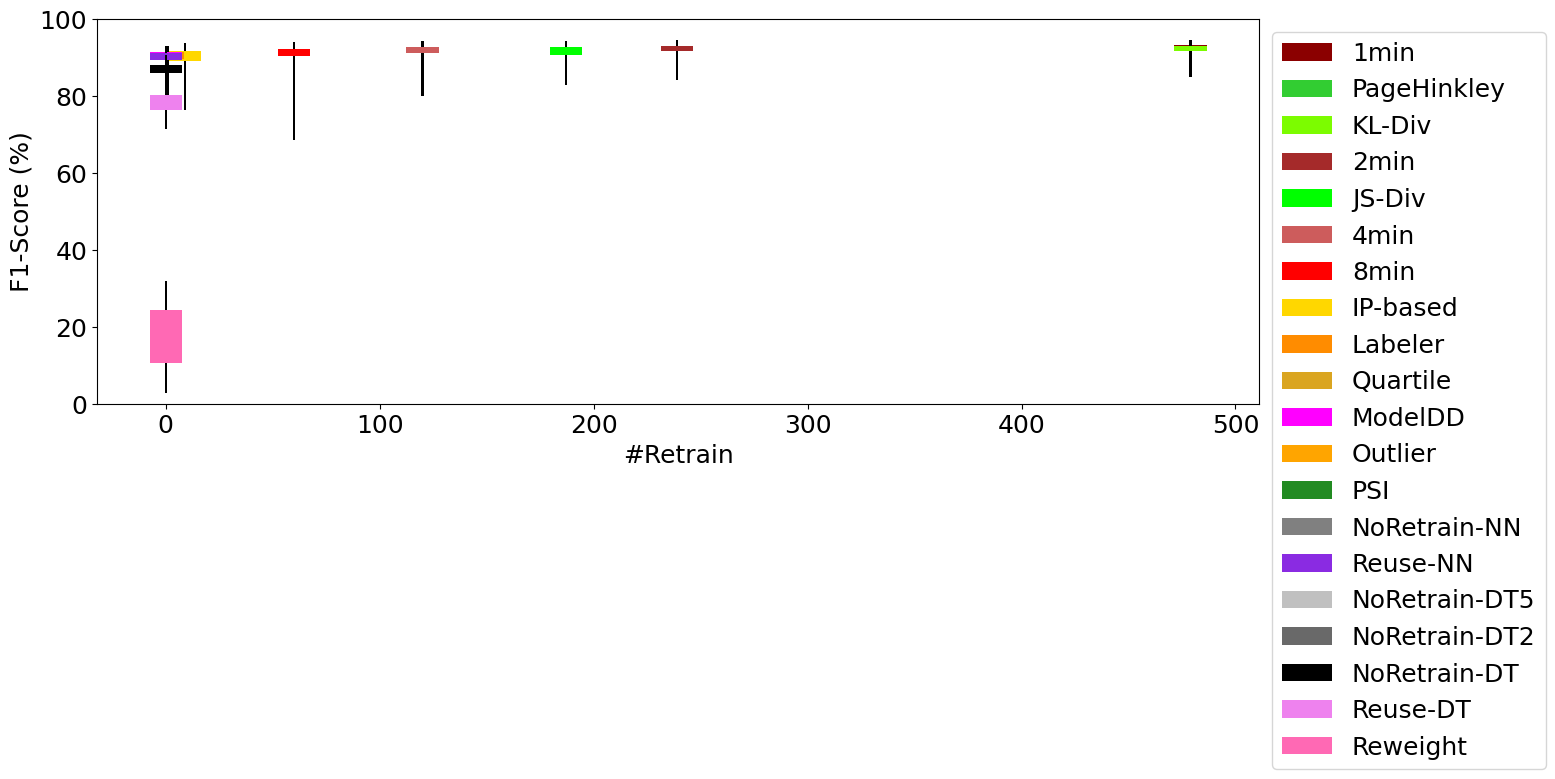

In [49]:
plt.figure(figsize=(15, 5))

# plt.xlim(-10, 500)
plt.xlabel('#Retrain')

plt.ylim(0, 100)
plt.ylabel('F1-Score (%)')

bar_width = 15
stick_width = 1

for index, row in df_plot[::-1].iterrows():
    # Bottom to top: LOCH (L-H), (O-C)
    plt.bar(row.retrain, row.close-row.open, bar_width, row.open, color=algorithms_color[row['algo']], label=row['id']) # main bar
    plt.bar(row.retrain, row.low-row.open, stick_width, row.open, color='black') # left stick
    plt.bar(row.retrain, row.high-row.close, stick_width, row.close, color='black') # right stick

plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

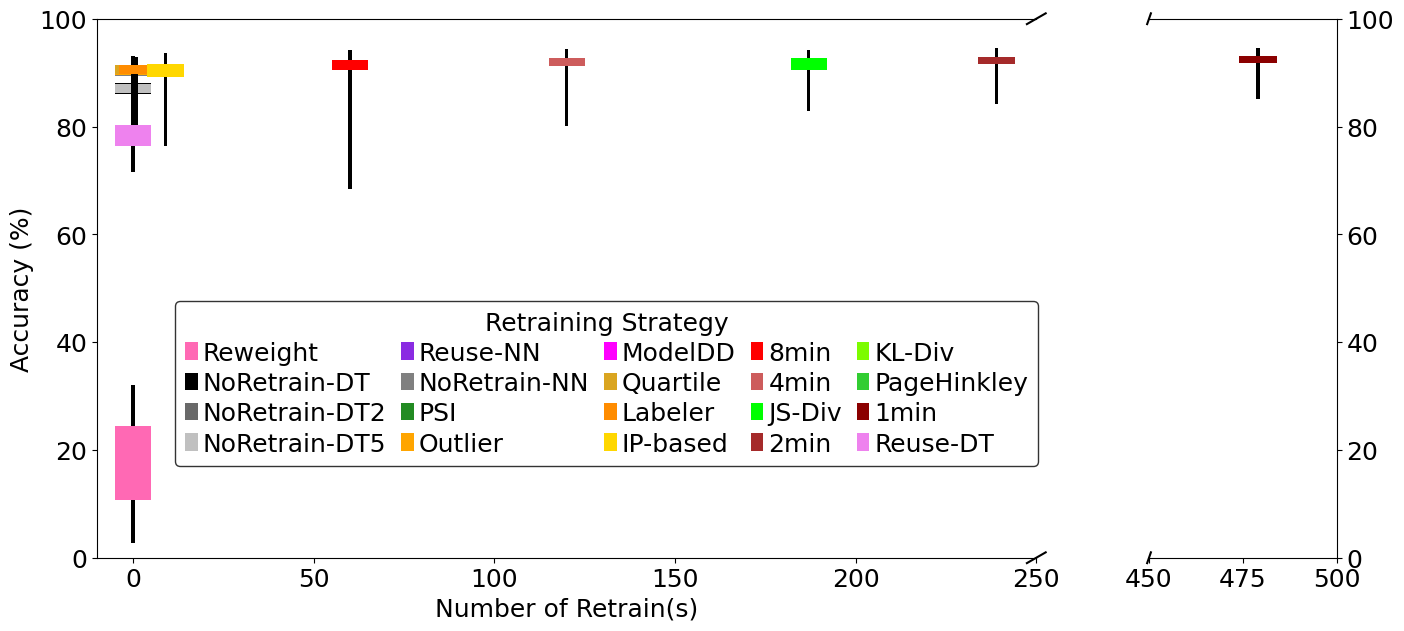

In [50]:
f, (ax, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 7), gridspec_kw={'width_ratios': [5, 1]})

# plt.xlim(-100, df_plot['retrain'].max()+100)
ax.set_xlabel('Number of Retrain(s)')

# plt.ylim(0, 100)
ax.set_ylabel('Accuracy (%)')

bar_width = 10
stick_width = 1

for index, row in df_plot.iterrows():
    if index != 1:
        # Bottom to top: LOCH (L-H), (O-C)
        ax.bar(row.retrain, row.close-row.open, bar_width, row.open, color=algorithms_color[row['algo']], label=row['id']) # main bar
        ax.bar(row.retrain, row.low-row.open, stick_width, row.open, color='black') # left stick
        ax.bar(row.retrain, row.high-row.close, stick_width, row.close, color='black') # right stick
        
        ax2.bar(row.retrain, row.close-row.open, bar_width, row.open, color=algorithms_color[row['algo']], label=row['id']) # main bar
        ax2.bar(row.retrain, row.low-row.open, stick_width, row.open, color='black') # left stick
        ax2.bar(row.retrain, row.high-row.close, stick_width, row.close, color='black') # right stick

row = df_plot.loc[1]

# Bottom to top: LOCH (L-H), (O-C)
ax.bar(row.retrain, row.close-row.open, bar_width, row.open, color=algorithms_color[row['algo']], label=row['id']) # main bar
ax.bar(row.retrain, row.low-row.open, stick_width, row.open, color='black') # left stick
ax.bar(row.retrain, row.high-row.close, stick_width, row.close, color='black') # right stick

ax2.bar(row.retrain, row.close-row.open, bar_width, row.open, color=algorithms_color[row['algo']], label=row['id']) # main bar
ax2.bar(row.retrain, row.low-row.open, stick_width, row.open, color='black') # left stick
ax2.bar(row.retrain, row.high-row.close, stick_width, row.close, color='black') # right stick
        
ax.set_xlim(-10, 250)
ax2.set_xlim(450, 500)
ax.set_ylim(0, 100)
ax2.set_ylim(0, 100)

ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
# ax.tick_params(labelright='off')
ax2.yaxis.tick_right()
ax2.tick_params(labelright='off')

d = 0.01  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d, 1+d), (-d, +d), **kwargs)
ax.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1-d, 1+d), **kwargs)
ax2.plot((-d, +d), (-d, +d), **kwargs)

plt.legend(bbox_to_anchor=(-5.25, 0.5), loc="upper left",
           title="Retraining Strategy", alignment='center', 
           frameon=True, facecolor=(1, 1, 1, 0), 
           edgecolor='black', labelspacing=0.25, columnspacing=0.6, 
           handletextpad=0.2, handlelength=0.5, ncol=5)

plt.show()

Insight #1: #Retrain is not perpendicular towards accuracy stability

# Distribution Violin Plot (which one is more plump?)

In [51]:
df_plot2 = values_df.copy(deep=True)
df_plot2.sort_values(by=['retrain'], ascending=[True], inplace=True)
df_plot2.reset_index(inplace=True, drop=True)
df_plot2.loc[df_plot2['algo'] == 'nurd', 'retrain'] = 0
df_plot2

,path,algo,length,f1,roc_auc,retrain,training_time_total,training_time_single,training_cpu_time,training_counter,inference_time_total,inference_time_single,inference_cpu_time,inference_counter
0,/mnt/extra/continuous-training/results/1717579...,nurd,480,"[0.0681294816331881, 0.0721397712738599, 0.066...","[0.513556243375378, 0.5144237185776803, 0.5134...",0.0,2268.060755,2268.060755,14153.80,1.0,891.047034,2.256867e-06,6156.50,394815847.0
1,/mnt/extra/continuous-training/results/1717619...,model_zoo_sample,480,"[0.9141931885258774, 0.9107644550068624, 0.900...","[0.7808341997847024, 0.7517463458533266, 0.724...",0.0,3959.367266,131.978909,22990.22,30.0,9761.476797,2.666125e-05,40850.90,366129722.0
2,/mnt/extra/continuous-training/results/1717700...,nn_clf_noretrain,480,"[0.9137089194892664, 0.9111484083506994, 0.899...","[0.7772600209413139, 0.775661755520527, 0.7829...",0.0,105.942696,105.942696,686.60,1.0,4794.631890,1.214397e-05,10950.17,394815847.0
3,/mnt/extra/continuous-training/results/1717587...,nn_clf_dd_nn,480,"[0.917535585118758, 0.914870131699636, 0.90371...","[0.7898381877864555, 0.7876834436917228, 0.794...",0.0,171.041479,171.041479,996.99,1.0,11449.620697,2.899990e-05,57326.43,394815847.0
4,/mnt/extra/continuous-training/results/1717704...,dt_clf_noretrain_2monitor,480,"[0.9994849988248726, 0.8964457631594483, 0.885...","[0.9994138156517904, 0.7935599505973587, 0.795...",0.0,7.440969,7.440969,19.47,1.0,125.007325,3.166219e-07,271.50,394815847.0
5,/mnt/extra/continuous-training/results/1717701...,model_zoo_sample_dt,480,"[0.999868643940244, 0.8039533908113423, 0.7804...","[0.9998574806651472, 0.7064619429418658, 0.695...",0.0,240.152132,8.005071,781.03,30.0,185.076186,5.054935e-07,481.71,366129722.0
6,/mnt/extra/continuous-training/results/1717700...,dt_clf_noretrain,480,"[0.9994849988248726, 0.8964198340028163, 0.885...","[0.9994138156517904, 0.7936983252156622, 0.796...",0.0,7.395818,7.395818,7.56,1.0,128.376732,3.251560e-07,397.05,394815847.0
7,/mnt/extra/continuous-training/results/1717467...,nn_clf_quartile,480,"[0.9183009053653396, 0.9157776382569456, 0.904...","[0.7899124647384557, 0.7880965327779492, 0.795...",0.0,171.814933,171.814933,760.35,1.0,9729.766112,2.464381e-05,32595.75,394815847.0
8,/mnt/extra/continuous-training/results/1717575...,nn_clf_psi,480,"[0.914981888558092, 0.912084331385732, 0.90033...","[0.7757803722096196, 0.7734655107930415, 0.781...",0.0,145.642166,145.642166,691.02,1.0,10833.957692,2.744053e-05,55048.01,394815847.0
9,/mnt/extra/continuous-training/results/1717705...,dt_clf_noretrain_5monitor,476,"[0.9994849988248726, 0.8963740085255608, 0.892...","[0.9994138156517904, 0.7935881260998761, 0.787...",0.0,7.406685,7.406685,18.26,1.0,125.934814,3.213507e-07,163.70,391892160.0


In [52]:
flatten_f1 = pd.DataFrame(columns=['Algorithm', 'F1-Score'])
for i, row in df_plot2.iterrows():
    for f1 in row['f1']:
        flatten_f1.loc[len(flatten_f1)] = [row['algo'], f1]
flatten_f1.head()

,Algorithm,F1-Score
0,nurd,0.068129
1,nurd,0.072140
2,nurd,0.066791
3,nurd,0.070307
4,nurd,0.076144


In [54]:
this_color = [algorithms_color[x] for x in flatten_f1['Algorithm'].unique().tolist()]
this_marker = [algorithms_marker[x] for x in flatten_f1['Algorithm'].unique().tolist()]
this_name = [algorithms_name[x]+'('+str(int(y))+')' for x, y in zip(df_plot2['algo'].tolist(), df_plot2['retrain'].tolist())]

In [22]:
plt.rcParams.update({'font.size': 18})

/tmp/ipykernel_1276401/3444534903.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  vp = sns.violinplot(data=flatten_f1, x='Algorithm', y='F1-Score', palette=this_color, ax=ax, linewidth=0.75)
/tmp/ipykernel_1276401/3444534903.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  vp.set_xticklabels(this_name)


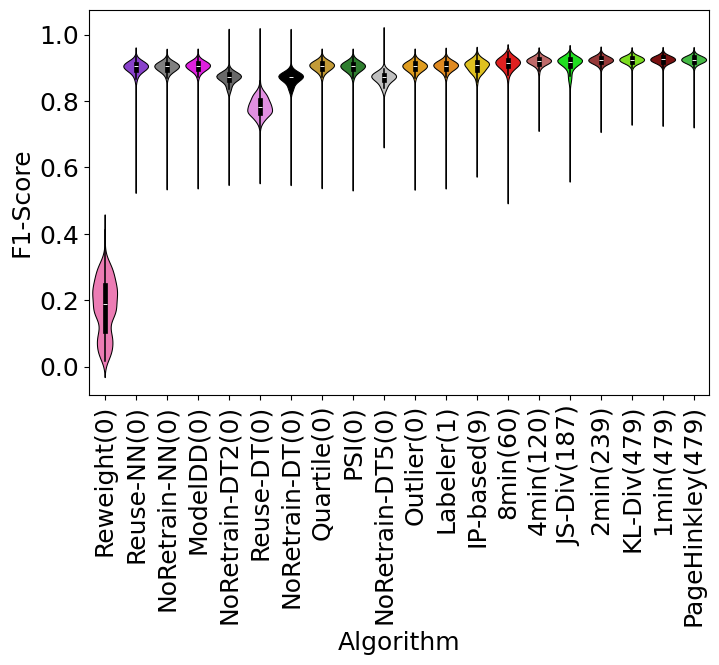

In [55]:
fig, ax = plt.subplots(figsize=(8, 5))

vp = sns.violinplot(data=flatten_f1, x='Algorithm', y='F1-Score', palette=this_color, ax=ax, linewidth=0.75)
vp.set_xticklabels(this_name)
plt.xticks(rotation=90)
plt.show()

# Average F1 against inference overhead

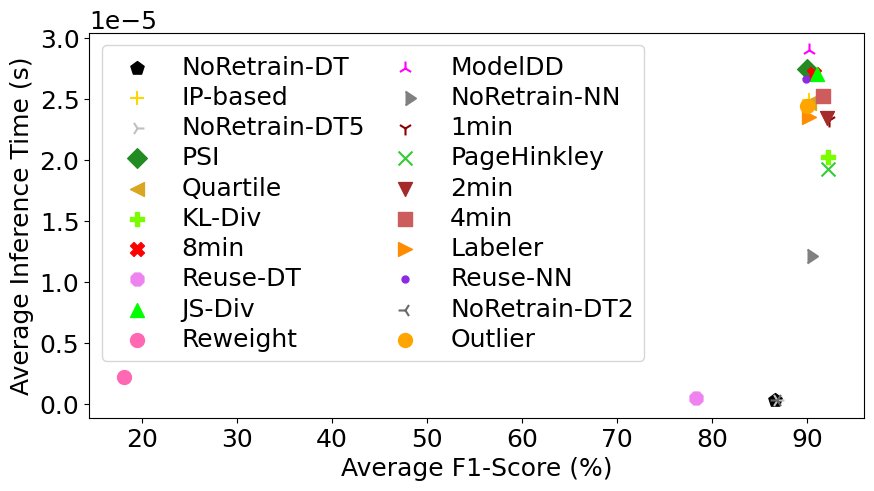

In [56]:
df_plot3 = pd.DataFrame(columns=['algo', 'id', 'retrain', 'average', 'inference_cpu_time', 'inference_time_single', 'color'])

for i, row in values_df.iterrows():
    df_plot3.loc[len(df_plot3)] = [row['algo'], algorithms_name[row['algo']], row['retrain'], (sum(row['f1'])/len(row['f1']))*100, row['inference_cpu_time'], row['inference_time_single'], algorithms_color[row['algo']]]

df_plot3['size'] = [100]*len(df_plot3)
df_plot3['marker'] = [algorithms_marker[x] for x in df_plot3['algo'].tolist()]

df_plot3.reset_index(inplace=True, drop=True)

fig, ax = plt.subplots(figsize = (10, 5))

for i, row in df_plot3.iterrows():
    plt.scatter(x=row['average'], y=row['inference_time_single'], s=row['size'], c=row['color'], label=row['id'], marker=row['marker'])
ax.set(xlabel ="Average F1-Score (%)", ylabel = "Average Inference Time (s)")

plt.legend(loc='best', ncol=2, labelspacing=0.25, columnspacing=0.6)

plt.show()

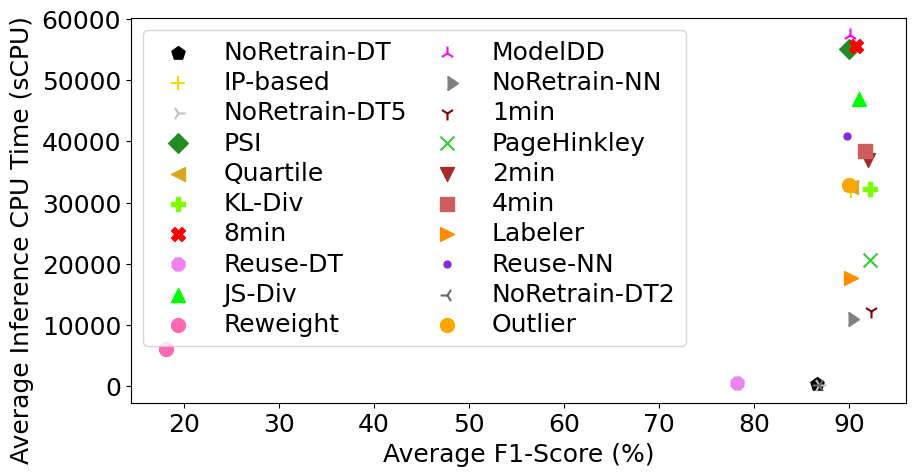

In [57]:
# df_plot3 = pd.DataFrame(columns=['algo', 'id', 'retrain', 'average', 'inference_cpu_time', 'inference_time_single', 'color'])

# for i, row in values_df.iterrows():
#     df_plot3.loc[len(df_plot3)] = [row['algo'], algorithms_name[row['algo']], row['retrain'], (sum(row['f1'])/len(row['f1']))*100, row['inference_cpu_time'], row['inference_time_single'], algorithms_color[row['algo']]]

# df_plot3['size'] = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
# df_plot3['marker'] = ['*', 'X', ',', 'D', 9, 'o', 'x', 'v', '+', '1', '.', '^', '<', '>', 'P', 'o']

# df_plot3.reset_index(inplace=True, drop=True)

fig, ax = plt.subplots(figsize = (10, 5))

for i, row in df_plot3.iterrows():
    plt.scatter(x=row['average'], y=row['inference_cpu_time'], s=row['size'], c=row['color'], label=row['id'], marker=row['marker'])
ax.set(xlabel ="Average F1-Score (%)", ylabel = "Average Inference CPU Time (sCPU)")
ax.yaxis.set_label_coords(-0.125, 0.425)

plt.legend(loc='best', ncol=2, labelspacing=0.25, columnspacing=0.6)

plt.show()

# 3. Improvement

In [58]:
df_plot4 = df_plot2.copy(deep=True)
df_plot4['id'] = df_plot4['algo'].apply(lambda x: algorithms_name[x])
print(df_plot4['algo'].tolist())
print(df_plot4['id'].tolist())

['nurd', 'model_zoo_sample', 'nn_clf_noretrain', 'nn_clf_dd_nn', 'dt_clf_noretrain_2monitor', 'model_zoo_sample_dt', 'dt_clf_noretrain', 'nn_clf_quartile', 'nn_clf_psi', 'dt_clf_noretrain_5monitor', 'nn_clf_outlier', 'nn_clf_labeler', 'nn_clf_ip_based', 'nn_period_8', 'nn_period_4', 'nn_clf_js', 'nn_period_2', 'nn_clf_kl', 'nn_period_1', 'nn_clf_ph']
['Reweight', 'Reuse-NN', 'NoRetrain-NN', 'ModelDD', 'NoRetrain-DT2', 'Reuse-DT', 'NoRetrain-DT', 'Quartile', 'PSI', 'NoRetrain-DT5', 'Outlier', 'Labeler', 'IP-based', '8min', '4min', 'JS-Div', '2min', 'KL-Div', '1min', 'PageHinkley']


In [59]:
df_plot4['id'].tolist()

['Reweight',
 'Reuse-NN',
 'NoRetrain-NN',
 'ModelDD',
 'NoRetrain-DT2',
 'Reuse-DT',
 'NoRetrain-DT',
 'Quartile',
 'PSI',
 'NoRetrain-DT5',
 'Outlier',
 'Labeler',
 'IP-based',
 '8min',
 '4min',
 'JS-Div',
 '2min',
 'KL-Div',
 '1min',
 'PageHinkley']

In [60]:
f1s = df_plot4['f1'].tolist()
print(len(f1s))

20


In [61]:
df_plot4['algo'].tolist()

['nurd',
 'model_zoo_sample',
 'nn_clf_noretrain',
 'nn_clf_dd_nn',
 'dt_clf_noretrain_2monitor',
 'model_zoo_sample_dt',
 'dt_clf_noretrain',
 'nn_clf_quartile',
 'nn_clf_psi',
 'dt_clf_noretrain_5monitor',
 'nn_clf_outlier',
 'nn_clf_labeler',
 'nn_clf_ip_based',
 'nn_period_8',
 'nn_period_4',
 'nn_clf_js',
 'nn_period_2',
 'nn_clf_kl',
 'nn_period_1',
 'nn_clf_ph']

In [62]:
for f1 in f1s:
    print(len(f1))

475
446
475
475
284
446
475
475
480
92
475
475
475
475
475
475
475
475
475
475


In [66]:
plot_df4 = pd.DataFrame(columns=[algo for idx, algo in enumerate(df_plot4['algo'].tolist()) if (idx != 4 and idx != 9)])

for i in range(35, 475):
    # print(i)
    # print(f1s[0][i])
    # print(f1s[1][i])
    # print(f1s[2][i-30])
    # print(f1s[3][i])
    # print(f1s[5][i-30])
    # print(f1s[6][i])
    # print(f1s[7][i])
    # print(f1s[8][i+5])
    # print(f1s[9][i])
    # print(f1s[10][i])
    # print(f1s[11][i])
    # print(f1s[12][i])
    # print(f1s[13][i])
    # print(f1s[14][i])
    # print(f1s[15][i])
    # print(f1s[16][i])
    # print(f1s[17][i])
    # print(f1s[18][i])
    plot_df4.loc[len(plot_df4)] = [f1s[0][i], f1s[1][i-30], f1s[2][i], f1s[3][i], f1s[5][i-30], f1s[6][i], f1s[7][i], f1s[8][i+5], f1s[10][i], f1s[11][i], f1s[12][i], f1s[13][i], f1s[14][i], f1s[15][i], f1s[16][i], f1s[17][i], f1s[18][i], f1s[19][i]]

plot_df4

,nurd,model_zoo_sample,nn_clf_noretrain,nn_clf_dd_nn,model_zoo_sample_dt,dt_clf_noretrain,nn_clf_quartile,nn_clf_psi,nn_clf_outlier,nn_clf_labeler,nn_clf_ip_based,nn_period_8,nn_period_4,nn_clf_js,nn_period_2,nn_clf_kl,nn_period_1,nn_clf_ph
0,0.105499,0.884727,0.903671,0.907907,0.776061,0.890114,0.908333,0.906600,0.903834,0.907399,0.911057,0.911104,0.918768,0.920040,0.919089,0.922142,0.921532,0.923174
1,0.091652,0.886355,0.917253,0.920648,0.788455,0.904161,0.921248,0.892778,0.917388,0.920391,0.921478,0.920721,0.929321,0.931715,0.930107,0.933421,0.933741,0.933585
2,0.123894,0.913333,0.897233,0.900949,0.801054,0.883837,0.901192,0.904682,0.897367,0.900507,0.906248,0.905913,0.912113,0.913605,0.913456,0.916274,0.915972,0.916012
3,0.152872,0.893854,0.884938,0.888738,0.786611,0.873126,0.888680,0.904590,0.885762,0.888426,0.899559,0.900271,0.902612,0.908685,0.905282,0.911086,0.911037,0.910891
4,0.167201,0.891450,0.901767,0.904826,0.824190,0.886889,0.904690,0.911899,0.902207,0.904683,0.911947,0.913947,0.916482,0.919319,0.919087,0.920063,0.920787,0.921217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,0.407657,0.897808,0.939156,0.939795,0.830653,0.912405,0.939688,0.787831,0.939569,0.942536,0.938009,0.940334,0.942271,0.949009,0.952113,0.948384,0.947785,0.948331
436,0.238095,0.941841,0.916015,0.916382,0.864796,0.900743,0.916576,0.885384,0.916121,0.922218,0.912695,0.935738,0.936670,0.937052,0.938170,0.937214,0.939126,0.937685
437,0.082928,0.914812,0.793135,0.795332,0.875071,0.783396,0.793995,0.897479,0.791109,0.807372,0.781999,0.867995,0.870777,0.871184,0.871919,0.848806,0.851236,0.834338
438,0.083828,0.781444,0.779058,0.781132,0.743202,0.770996,0.778820,0.901042,0.776462,0.794494,0.764613,0.860802,0.863209,0.864345,0.854323,0.854276,0.856580,0.856165


In [67]:
plot_df = plot_df4.groupby(np.arange(len(plot_df4))//10).mean()
plot_df

,nurd,model_zoo_sample,nn_clf_noretrain,nn_clf_dd_nn,model_zoo_sample_dt,dt_clf_noretrain,nn_clf_quartile,nn_clf_psi,nn_clf_outlier,nn_clf_labeler,nn_clf_ip_based,nn_period_8,nn_period_4,nn_clf_js,nn_period_2,nn_clf_kl,nn_period_1,nn_clf_ph
0,0.151637,0.898656,0.902116,0.905473,0.789077,0.886873,0.905902,0.897844,0.902718,0.905476,0.910258,0.910500,0.914581,0.919096,0.917181,0.920614,0.920935,0.920875
1,0.193845,0.894486,0.896655,0.899538,0.812250,0.881110,0.899197,0.904137,0.896965,0.899320,0.909202,0.910156,0.911820,0.917127,0.915606,0.918302,0.919218,0.918872
2,0.259791,0.913549,0.910098,0.912333,0.798025,0.885360,0.912384,0.911757,0.910964,0.913060,0.917493,0.924731,0.926037,0.930804,0.928164,0.931284,0.931660,0.931155
3,0.250125,0.911013,0.908788,0.910602,0.802431,0.874573,0.911306,0.787504,0.909536,0.911793,0.910632,0.914605,0.922814,0.923067,0.925121,0.927063,0.927512,0.927286
4,0.183179,0.780203,0.781716,0.783506,0.728993,0.755855,0.784840,0.901660,0.781932,0.782671,0.799899,0.709994,0.812650,0.804086,0.840800,0.854335,0.854498,0.852962
5,0.267886,0.910076,0.903004,0.904906,0.814512,0.882933,0.904784,0.904943,0.903088,0.905708,0.895667,0.845086,0.919766,0.924230,0.924466,0.925975,0.926112,0.925801
6,0.086746,0.902523,0.911730,0.913655,0.772312,0.857270,0.915611,0.903879,0.912566,0.914351,0.910080,0.920331,0.925123,0.925284,0.927725,0.929555,0.929858,0.929645
7,0.202031,0.906585,0.902381,0.904424,0.799197,0.877467,0.904714,0.900227,0.902949,0.905137,0.902937,0.913436,0.917339,0.899155,0.921396,0.924532,0.924980,0.924653
8,0.179605,0.880108,0.885351,0.888898,0.783444,0.871404,0.888806,0.895898,0.885739,0.888303,0.881363,0.902113,0.904480,0.910568,0.906918,0.910263,0.911472,0.908738
9,0.094568,0.903962,0.908921,0.910977,0.775141,0.854072,0.912850,0.908691,0.909659,0.911674,0.916632,0.913765,0.919029,0.926489,0.925268,0.926435,0.926971,0.926383


In [68]:
print(plot_df.columns.tolist())

['nurd', 'model_zoo_sample', 'nn_clf_noretrain', 'nn_clf_dd_nn', 'model_zoo_sample_dt', 'dt_clf_noretrain', 'nn_clf_quartile', 'nn_clf_psi', 'nn_clf_outlier', 'nn_clf_labeler', 'nn_clf_ip_based', 'nn_period_8', 'nn_period_4', 'nn_clf_js', 'nn_period_2', 'nn_clf_kl', 'nn_period_1', 'nn_clf_ph']


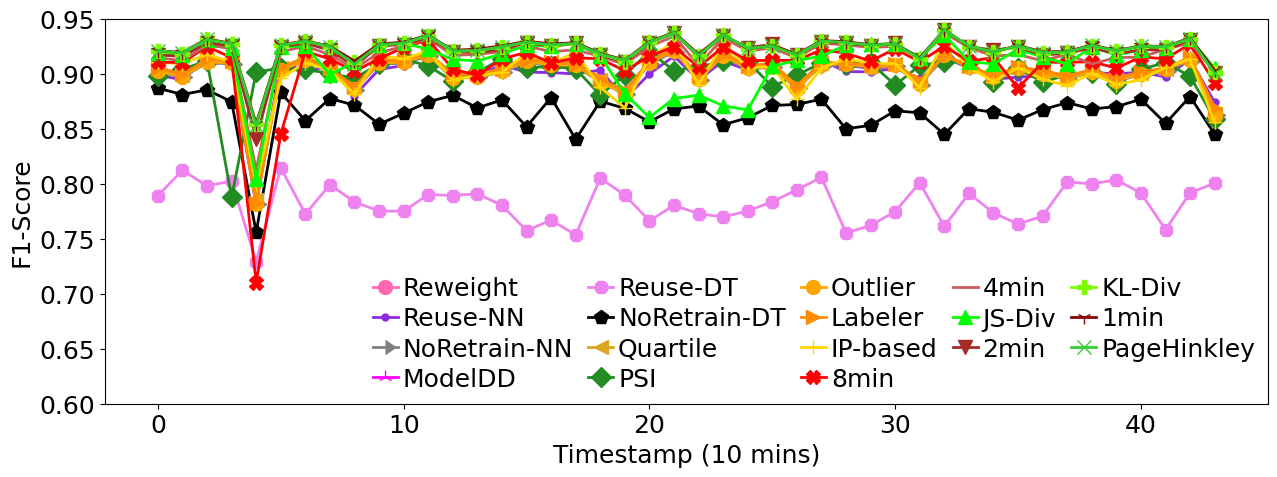

In [71]:
fig, ax = plt.subplots(figsize=(15, 5))
# plot_df.plot()
for col in plot_df[::-1].columns:
    plt.plot(plot_df.index, plot_df[col], label=algorithms_name[col], color=algorithms_color[col], linewidth=2, marker=algorithms_marker[col], markersize=10)
plt.legend(ncol=5, loc="best",
           frameon=False, facecolor=(1, 1, 1, 0), 
           edgecolor='black', labelspacing=0.25, columnspacing=0.6, borderpad=0, 
           handletextpad=0.2, handlelength=1)
plt.ylim(0.6, 0.95)
plt.xlabel('Timestamp (10 mins)')
plt.ylabel('F1-Score')
plt.show()

In [72]:
plt.rcParams.update({'font.size': 16})

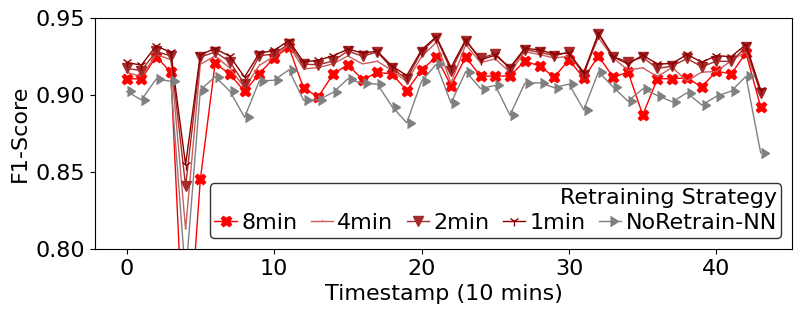

In [73]:
fig, ax = plt.subplots(figsize=(9, 3))
# plot_df.plot()
for col in ['nn_period_8', 'nn_period_4', 'nn_period_2', 'nn_period_1', 'nn_clf_noretrain']:
    plt.plot(plot_df.index, plot_df[col], label=algorithms_name[col], color=algorithms_color[col], linewidth=1, marker=algorithms_marker[col], markersize=7.5)
plt.legend(ncol=5, loc="lower right",
           title="Retraining Strategy", alignment='right', 
           frameon=True, facecolor=(1, 1, 1, 0), 
           edgecolor='black', labelspacing=0.25, columnspacing=0.6, borderpad=0.2, 
           handletextpad=0.2, handlelength=1)
plt.ylim(0.8, 0.95)
plt.xlabel('Timestamp (10 mins)')
plt.ylabel('F1-Score')
plt.show()

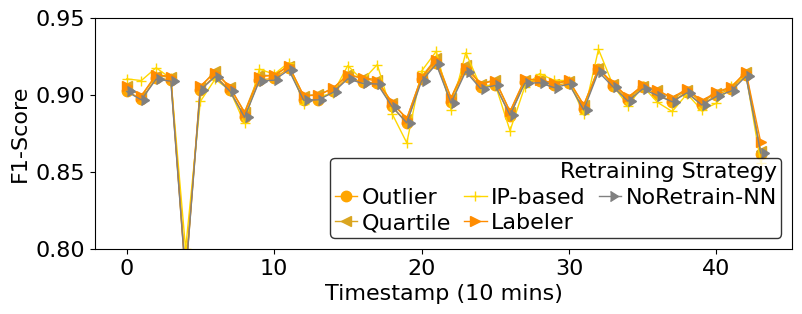

In [74]:
fig, ax = plt.subplots(figsize=(9, 3))
# plot_df.plot()
for col in ['nn_clf_outlier', 'nn_clf_quartile', 'nn_clf_ip_based', 'nn_clf_labeler', 'nn_clf_noretrain']: # 
    plt.plot(plot_df.index, plot_df[col], label=algorithms_name[col], color=algorithms_color[col], linewidth=1, marker=algorithms_marker[col], markersize=7.5)
plt.legend(ncol=3, loc="lower right",
           title="Retraining Strategy", alignment='right', 
           frameon=True, facecolor=(1, 1, 1, 0), 
           edgecolor='black', labelspacing=0.25, columnspacing=0.6, borderpad=0.2, 
           handletextpad=0.2, handlelength=1)
plt.ylim(0.8, 0.95)
plt.xlabel('Timestamp (10 mins)')
plt.ylabel('F1-Score')
plt.show()

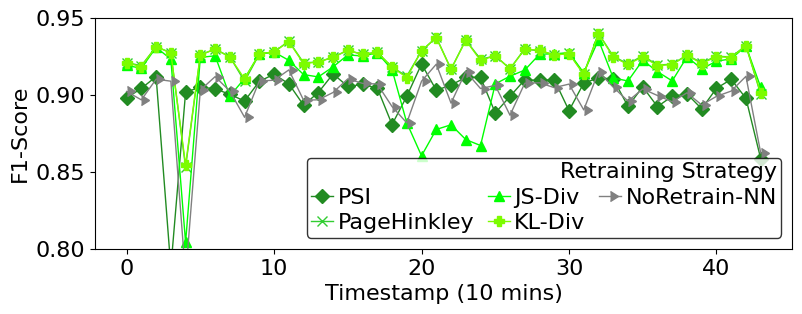

In [76]:
fig, ax = plt.subplots(figsize=(9, 3))
# plot_df.plot()
for col in ['nn_clf_psi', 'nn_clf_ph', 'nn_clf_js', 'nn_clf_kl', 'nn_clf_noretrain']: #'nn_clf_ks', 
    plt.plot(plot_df.index, plot_df[col], label=algorithms_name[col], color=algorithms_color[col], linewidth=1, marker=algorithms_marker[col], markersize=7.5)
plt.legend(ncol=3, loc="lower right",
           title="Retraining Strategy", alignment='right', 
           frameon=True, facecolor=(1, 1, 1, 0), 
           edgecolor='black', labelspacing=0.25, columnspacing=0.6, borderpad=0.2, 
           handletextpad=0.2, handlelength=1)
plt.ylim(0.8, 0.95)
plt.xlabel('Timestamp (10 mins)')
plt.ylabel('F1-Score')
plt.show()

In [ ]:
/mnt/extra/continuous-training/results/1716763301509528146/dt_clf_noretrain.csv

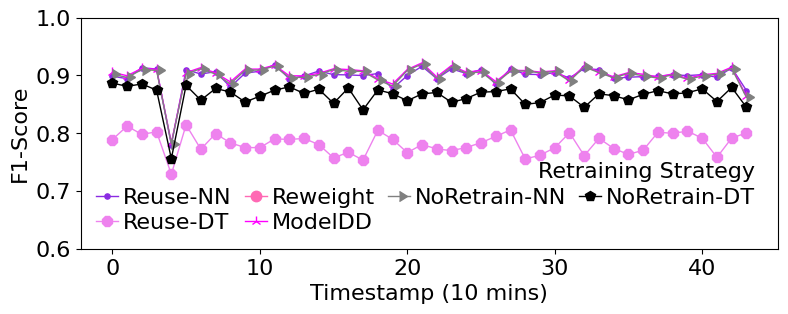

In [78]:
fig, ax = plt.subplots(figsize=(9, 3))
# plot_df.plot()
for col in ['model_zoo_sample', 'model_zoo_sample_dt', 'nurd', 'nn_clf_dd_nn', 'nn_clf_noretrain', 'dt_clf_noretrain']:
    plt.plot(plot_df.index, plot_df[col], label=algorithms_name[col], color=algorithms_color[col], linewidth=1, marker=algorithms_marker[col], markersize=7.5)
plt.legend(ncol=4, loc="best",
           title="Retraining Strategy", alignment='right', 
           frameon=False, facecolor=(1, 1, 1, 0), 
           edgecolor='black', labelspacing=0.25, columnspacing=0.6, borderpad=0.2, 
           handletextpad=0.2, handlelength=1)
plt.ylim(0.6, 1)
plt.xlabel('Timestamp (10 mins)')
plt.ylabel('F1-Score')
plt.show()

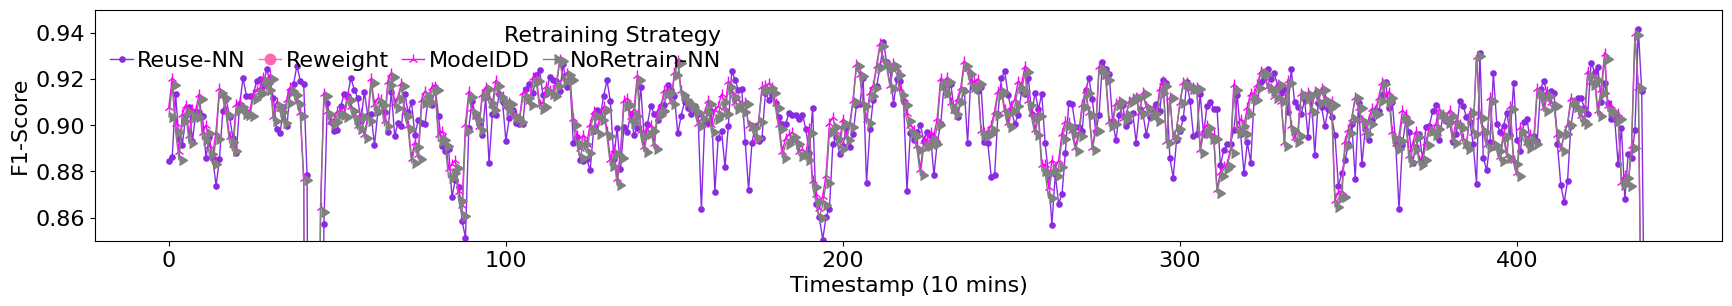

In [82]:
fig, ax = plt.subplots(figsize=(21, 3))
# plot_df.plot()
for col in ['model_zoo_sample', 'nurd', 'nn_clf_dd_nn', 'nn_clf_noretrain']: #, 'model_zoo_sample_dt', 'dt_clf_noretrain'
    plt.plot(plot_df4.index, plot_df4[col], label=algorithms_name[col], color=algorithms_color[col], linewidth=1, marker=algorithms_marker[col], markersize=7.5)
plt.legend(ncol=4, loc="best",
           title="Retraining Strategy", alignment='right', 
           frameon=False, facecolor=(1, 1, 1, 0), 
           edgecolor='black', labelspacing=0.25, columnspacing=0.6, borderpad=0.2, 
           handletextpad=0.2, handlelength=1)
plt.ylim(0.85, 0.95)
plt.xlabel('Timestamp (10 mins)')
plt.ylabel('F1-Score')
plt.show()